In [19]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Edge detection

Edges are important features in an image, this is one of the most saillant feature that our eye catches.

Edges are also highly correlated with object borders, this is why a lot of different thechniques have been developped.

## Finite differences

Taylor's theorem:
$$
\begin{align}
f(x + h) &= f(x) + \frac{f'(x)}{1!}h + \frac{f^{(2)}(x)}{2!}h^2 + \cdots + \frac{f^{(n)}(x)}{n!}h^n + R_n(x)\\
f(x + h) &= f(x) + f'(x)h + R_1^+(x)\\
f(x - h) &= f(x) - f'(x)h + R_1^-(x)\\
\end{align}
$$

We neglect $R_1$ and we substract the two last equations:

$$
\begin{align}
f(x + h) - f(x - h) &\approx  2f'(x)h  \\
\\
f'(x) &\approx \frac{f(x + h) - f(x - h)}{2h}  \\
\\
\end{align}
$$

Similarly for $f''(x)$

$$f''(x) \approx \frac{f(x+h) - 2 f(x) + f(x-h)}{h^{2}}$$


Finite difference for 2 variables

\begin{align}
f_{x}(x,y) &\approx  \frac{f(x+h ,y) - f(x-h,y)}{2h}\\
f_{y}(x,y) &\approx  \frac{f(x,y+k ) - f(x,y-k)}{2k}\\
f_{xx}(x,y) &\approx  \frac{f(x+h ,y) - 2 f(x,y) + f(x-h,y)}{h^2}\\
f_{yy}(x,y) &\approx  \frac{f(x,y+k) - 2 f(x,y) + f(x,y-k)}{k^2}\\
f_{xy}(x,y) &\approx  \frac{f(x+h,y+k) - f(x+h,y-k) - f(x-h,y+k) + f(x-h,y-k)}{4hk}\\
\end{align}

Laplacian operator

\begin{align}
\Delta f &= \nabla^2 f = \nabla \cdot \nabla f\\
\Delta f &= \sum_{i=1}^n \frac {\partial^2 f}{\partial x^2_i}\\
\Delta f &= \nabla^2 f = \frac {\partial^2 f}{\partial x^2} + \frac {\partial^2 f}{\partial y^2}\\
\end{align}

For images,these operators are identical to convolutions with specific structuring element:

example 1D second-derivative is obtained using:

\begin{bmatrix}
1 & -2 & 1\\
\end{bmatrix}

2D Laplacian:
\begin{bmatrix}
0 & -1 & 0\\
-1 & +4 & -1\\
0 & -1 & 0\\
\end{bmatrix}

2D including diagonals:

\begin{bmatrix}
-1 & -1 & -1\\
-1 & +8 & -1\\
-1 & -1 & -1\\
\end{bmatrix}

3D Laplacian (stucturing element is a 3x3x3 cube):

\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{bmatrix}

\begin{bmatrix}
0 & 1 & 0\\
1 & -6 & 1\\
0 & 1 & 0\\
\end{bmatrix}

\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{bmatrix}

## Gradient operator

\begin{align}
\nabla f  = \left(\frac{\partial f}{\partial x_1 }, \dots,  \frac{\partial f}{\partial x_n }  \right)
\end{align}

2D

\begin{align}
\nabla f(x, y) =
\left(\frac{\partial f}{\partial x},
\frac{\partial f}{\partial y}\right)\\
\end{align}

3D

\begin{align}
\nabla f(x, y, z) =
\left(\frac{\partial f}{\partial x},
\frac{\partial f}{\partial y},
\frac{\partial f}{\partial z}\right)\\
\end{align}

Amplitude and angle:

\begin{align}
amplitude &= \sqrt { (\frac{\partial f}{\partial x})^2 + (\frac{\partial f}{\partial y})^2 }\\
angle &= \tan^{-1} ( \frac{\frac{\partial f}{\partial x}} {\frac{\partial f}{\partial y}})\\
\end{align}

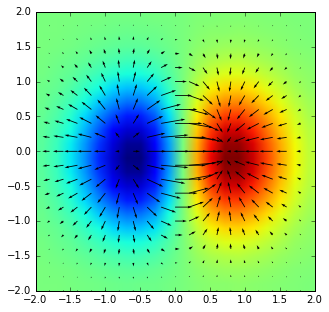

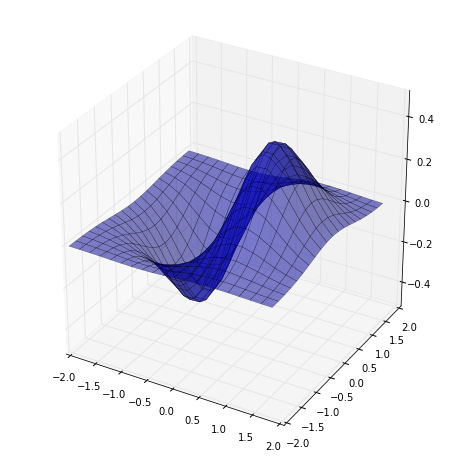

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import ndimage,interpolate
from scipy.ndimage.filters import convolve1d
from mpl_toolkits.mplot3d import Axes3D

r = np.arange(-2, 2, 0.2)
x,y = np.meshgrid(r,r)

z = x*np.exp(-x**2-y**2)

w = np.array([-1,0,+1])

dx = convolve1d(z,-w,axis=1)
dy = convolve1d(z,-w,axis=0)

plt.figure(figsize=[5,5])

plt.imshow(z,extent=[-2,2,-2,2])
plt.quiver(x,y,dx,dy)

fig3d = plt.figure(figsize=[8,8])
ax = fig3d.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0.2,color=[0.,0.,.8,.5])

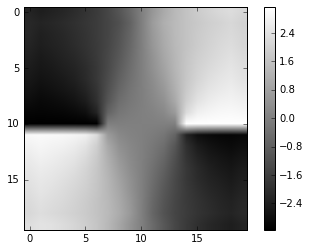

In [21]:
plt.imshow(np.arctan2(dy,dx),cmap=plt.cm.gray)
plt.colorbar()

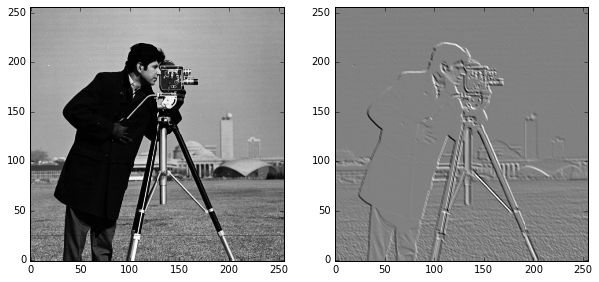

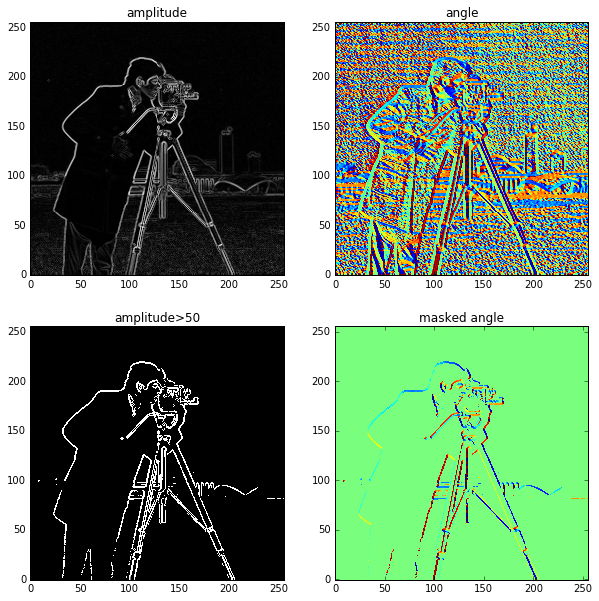

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as npy
from scipy import ndimage,interpolate
from scipy.ndimage.filters import convolve,convolve1d,gaussian_filter
from mpl_toolkits.mplot3d import Axes3D
from skimage.data import camera

def Cx(ima):
    """x' derivative of image"""
    c = convolve1d(ima,npy.array([-1,0,1]),axis=1,cval=1)
    return c/2.0

def Cy(ima):
    """y' derivative of image"""
    c = convolve1d(ima,npy.array([-1,0,1]),axis=0,cval=1)
    return c/2.0

def grad(ima):
    """gradient of an image"""
    k = npy.array([[0,1,0],[1,0,-1],[0,-1,0]])
    s = convolve(ima,k)
    return s



im = camera().astype(np.float)[-1::-2,::2]
s = grad(im)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(1,2,2)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')

gx = Cx(im)
gy = Cy(im)

magnitude = np.sqrt(gx**2+gy**2)
angle = np.arctan2(gy,gx)
masked_angle = angle.copy()
masked_angle[magnitude<50]=0

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(magnitude,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('amplitude')
plt.subplot(2,2,2)
plt.imshow(angle,interpolation='nearest',cmap=cm.jet,origin='lower')
plt.title('angle')
plt.subplot(2,2,3)
plt.imshow(magnitude>50,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('amplitude>50')
plt.subplot(2,2,4)
plt.imshow(masked_angle,interpolation='nearest',cmap=cm.jet,origin='lower')
plt.title('masked angle');

Question:
* what are the gradient fields for the following images?

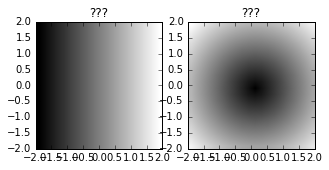

In [23]:
plt.figure(figsize=[5,5])

plt.subplot(1,2,1)
z = x
plt.imshow(z,extent=[-2,2,-2,2],cmap=cm.gray)
plt.title('???')

plt.subplot(1,2,2)
z = np.sqrt(x**2+y**2)
plt.imshow(z,extent=[-2,2,-2,2],cmap=cm.gray)
plt.title('???');


## Gradient amplitude

$$\vec \nabla f=
\Bigg[ 
\begin{array}{}
G_x \\
G_y
\end{array}
\Bigg] = 
\Bigg[ 
\begin{array}{}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\end{array}
\Bigg]$$

amplitude is given by:

$$\nabla f= ||\vec \nabla f|| = [G_x^2 + G_y^2]{1/2}$$

which can be approximated by (increase processing speed):

$$\nabla f \approx |G_x] + [G_y]$$

Different versions of the gradient amplitude extraction from an image have been proposed, as presented bellow.

### Robert's operator

Robert defines the local image gradient amplitude by:

$$||\vec \nabla f||= |f(x,y)-f(x+1,y+1)|+|f(x+1,y)-f(x,y+1)|$$

which corresponds to the convolution with the two following structuring elements:

\begin{bmatrix}
1 & 0 \\
0& -1 \\
\end{bmatrix}


and

\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}

### Prewitt

Prewitt's operator detect horizopntal and vertical borders using:

\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}

and

\begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1\\
\end{bmatrix}

### Sobel

Similarly to Prewitt's opertor, Sobel border detector is using two orthogonal filters,

\begin{bmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1\\
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1\\
\end{bmatrix}



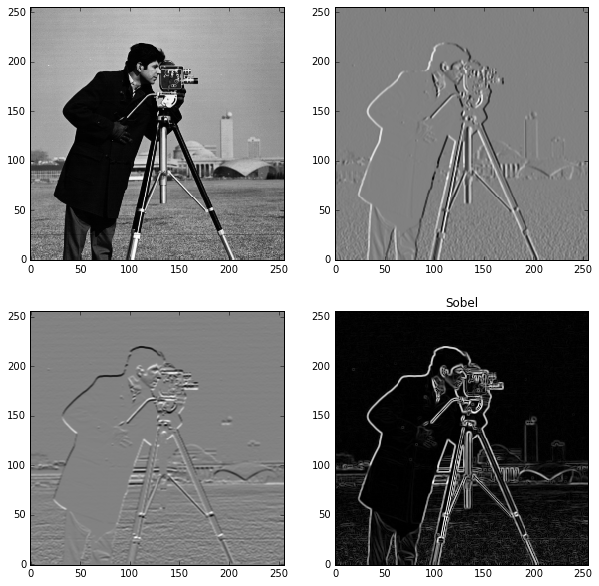

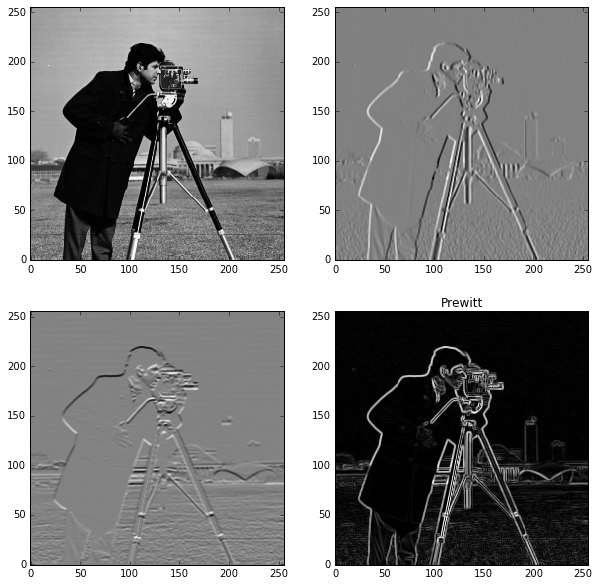

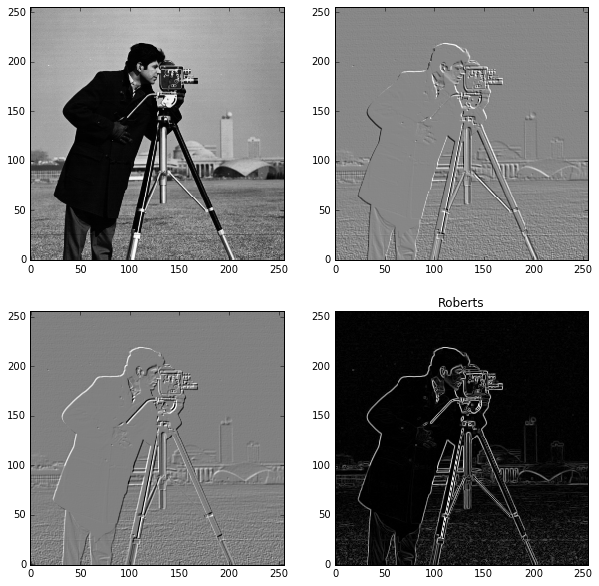

In [24]:
def sobel(ima):
    """Sobel  of image"""
    kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    ky = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    sx = convolve(ima,kx)
    sy = convolve(ima,ky)
    s = np.sqrt(sx**2+sy**2)
    return (sx,sy,s)

def prewitt(ima):
    """Sobel  of image"""
    kx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    ky = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    sx = convolve(ima,kx)
    sy = convolve(ima,ky)
    s = np.sqrt(sx**2+sy**2)
    return (sx,sy,s)

def roberts(ima):
    """Sobel  of image"""
    kx = np.array([[1,0],[0,-1]])
    ky = np.array([[0,1],[-1,0]])
    sx = convolve(ima,kx)
    sy = convolve(ima,ky)
    s = np.sqrt(sx**2+sy**2)
    return (sx,sy,s)


sx,sy,s = sobel(im)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,2)
plt.imshow(sx,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,3)
plt.imshow(sy,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,4)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('Sobel')

sx,sy,s = prewitt(im)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,2)
plt.imshow(sx,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,3)
plt.imshow(sy,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,4)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('Prewitt')

sx,sy,s = roberts(im)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,2)
plt.imshow(sx,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,3)
plt.imshow(sy,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,4)
plt.imshow(s,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('Roberts');


### Morphological gradient

A gradient can be easily found by substracting local minimum from local maximum, this is called *morphological gradient* by reference with the morphological operators (see further).


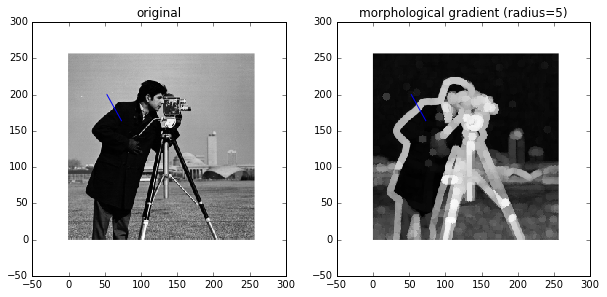

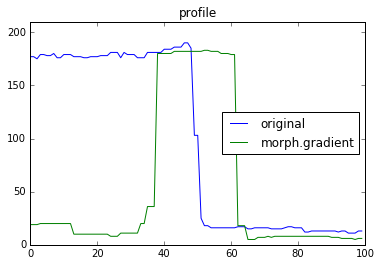

In [25]:
from skimage.morphology import disk
import skimage.filters.rank as skr
from scipy import ndimage

def profile(ima,p0,p1,num):
    n = np.linspace(p0[0],p1[0],num)
    m = np.linspace(p0[1],p1[1],num)
    return [n,m,ndimage.map_coordinates(ima, [m,n], order=0)]

im = camera()[-1::-2,::2]

#filtered version
radius = 5
selem = disk(radius)
rank1 = skr.maximum(im,selem)
rank2 = skr.minimum(im,selem)
rank3 = skr.gradient(im,selem)
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank1] = profile(rank1,(53,200),(73,164),100)
[x,y,prank2] = profile(rank2,(53,200),(73,164),100)
[x,y,prank3] = profile(rank3,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('original')
plt.plot(x,y)
plt.subplot(1,2,2)
plt.imshow(rank3,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('morphological gradient (radius=%d)'%radius)
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank3,label='morph.gradient')
plt.title('profile')
plt.gca().set_ylim([0,210])
plt.legend(loc=5);

Two other related morphological gradient are:
* top-hat which is the local maximum - the original image
* bottom-hat which is the original image - the local minimum

These two filter give thinner borders, but the border are not centered.

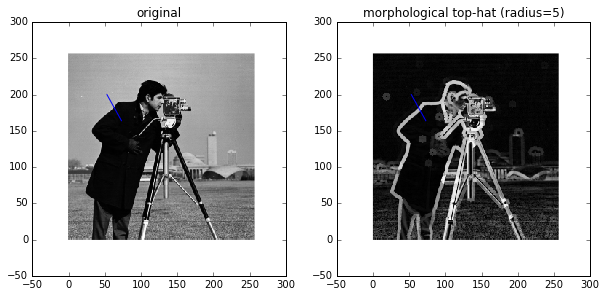

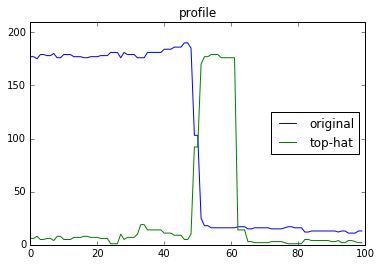

In [26]:
top_hat = rank1 - im
bottom_hat = im - rank2
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank1] = profile(im,(53,200),(73,164),100)
[x,y,prank2] = profile(top_hat,(53,200),(73,164),100)
[x,y,prank3] = profile(bottom_hat,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('original')
plt.plot(x,y)
plt.subplot(1,2,2)
plt.imshow(top_hat,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('morphological top-hat (radius=%d)'%radius)
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank2,label='top-hat')
plt.title('profile')
plt.gca().set_ylim([0,210])
plt.legend(loc=5);

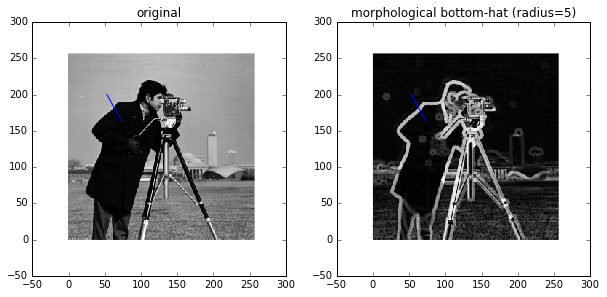

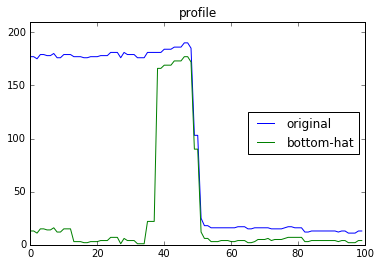

In [27]:
fig = plt.figure(1,figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('original')
plt.plot(x,y)
plt.subplot(1,2,2)
plt.imshow(top_hat,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('morphological bottom-hat (radius=%d)'%radius)
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank3,label='bottom-hat')
plt.title('profile')
plt.gca().set_ylim([0,210])
plt.legend(loc=5);

Attention must be paid to border detection method used, the size of the detected objects may be inluenced, for example, the top-hat transform is over-estimating the size of bright objects and under-estimating the size of dark objects. On the contrary, the bottom-hat is shifting borders in the reverse direction.

### Laplacian of gaussian

Laplacian of gaussian is a combination of a high-pass laplacian filter applied on a gaussian low-pass filtered image.

2D gaussian kernel is defined as:

$$G(x,y;\sigma) = \frac{1}{2\pi\sigma^2} \, e ^{-\big( \frac{x^2+y^2}{2\, \sigma^2}\big)}$$

The Laplacian of Gaussian kernel is then:

$$\Delta f = \sum_{i=1}^n \frac {\partial^2 f}{\partial x^2_i}$$

$$\begin{align}
LoG(x,y;\sigma) &= \Delta \frac{1}{2\pi\sigma^2} \, e ^{-\big( \frac{x^2+y^2}{2\, \sigma^2}\big)}\\
&= - \frac{1}{\pi \sigma^4}\big[ 1-\frac{x^2+y^2}{2 \sigma ^2}\big] e ^{-\big(\frac{x^2+y^2}{2\, \sigma^2}\big)} \\
\end{align}\\$$




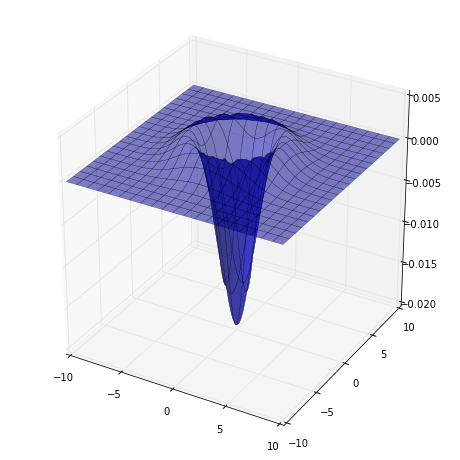

In [28]:
sigma = 2.
X,Y = np.meshgrid(np.arange(-10.,10,.1),np.arange(-10.,10,.1))
e = (X**2+Y**2)/(2*sigma**2)

Z = - 1./(np.pi * sigma**4)*(1-e)*np.exp(-e)

fig3d = plt.figure(figsize=[8,8])
ax = fig3d.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=.2,color=[0.,0.,.8,.5])

### Difference of Gaussian (D.O.G) operator

Gaussian 2D kernel:

$g(x, y; \sigma) = \frac {1}{2{\pi} \sigma^2}e^{-(x^2+y^2)/2\sigma^2}$

image convolution with a gaussian kernel:

$L(\cdot, \cdot ; \sigma)\ = g(\cdot, \cdot ; \sigma) * f(\cdot, \cdot)$

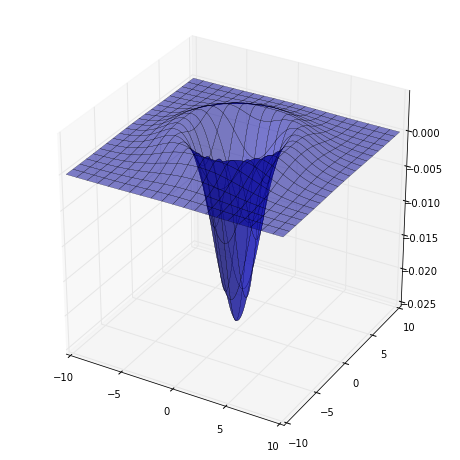

In [29]:
sigma1 = 2
sigma2 = sigma1*1.6
    
X,Y = np.meshgrid(np.arange(-10.,10,.1),np.arange(-10.,10,.1))
Z1 = 1./(2*np.pi * sigma1**2)*np.exp(-(X**2+Y**2)/(2*sigma1**2))
Z2 = 1./(2*np.pi * sigma2**2)*np.exp(-(X**2+Y**2)/(2*sigma2**2))

fig3d = plt.figure(figsize=[8,8])
ax = fig3d.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z2-Z1, linewidth=.2,color=[0.,0.,.8,.5])

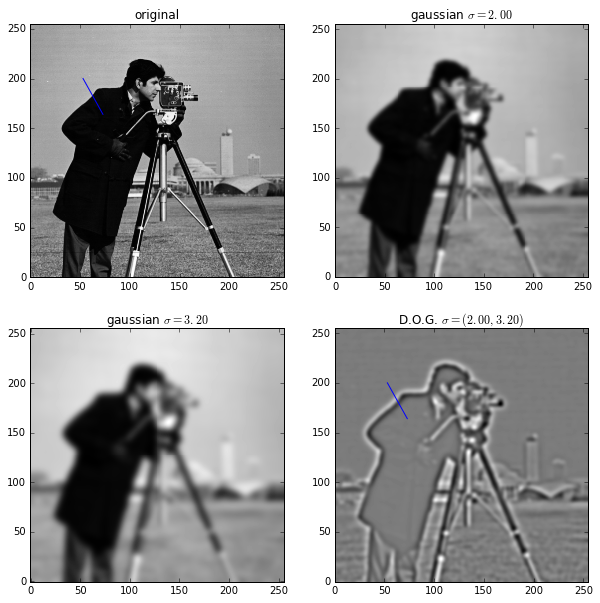

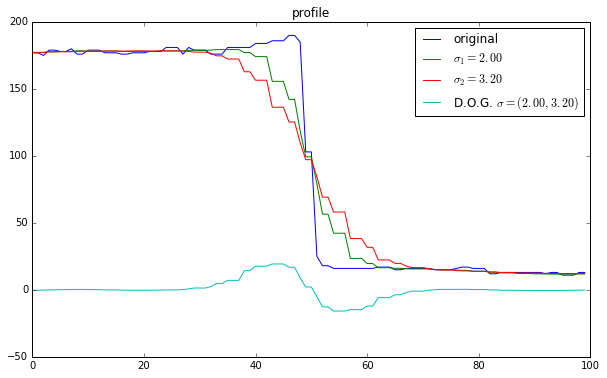

In [30]:
im = 1.*camera()[-1::-2,::2]

sigma1 = 2.
sigma2 = 1.6*sigma1
g1 = gaussian_filter(im,sigma1)
g2 = gaussian_filter(im,sigma2)

[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,p_s1] = profile(g1,(53,200),(73,164),100)
[x,y,p_s2] = profile(g2,(53,200),(73,164),100)
[x,y,p_s12] = profile(g1-g2,(53,200),(73,164),100)


plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.gca().set_xlim(0,255)
plt.gca().set_ylim(0,255)
plt.title('original')
plt.subplot(2,2,2)
plt.imshow(g1,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('gaussian $\sigma=%.2f$'%sigma1)
plt.subplot(2,2,3)
plt.imshow(g2,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('gaussian $\sigma=%.2f$'%sigma2)
plt.subplot(2,2,4)
plt.imshow(1.*g1-g2,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('D.O.G. $\sigma=(%.2f,%.2f)$'%(sigma1,sigma2));
plt.plot(x,y)
plt.gca().set_xlim(0,255)
plt.gca().set_ylim(0,255)


plt.figure(figsize=[10,6])
plt.plot(p,label='original')
plt.plot(p_s1,label='$\sigma_1=%.2f$'%sigma1)
plt.plot(p_s2,label='$\sigma_2=%.2f$'%sigma2)
plt.plot(p_s12,label='D.O.G. $\sigma=(%.2f,%.2f)$'%(sigma1,sigma2))
plt.title('profile')
plt.legend(loc=1);

# Gaussian and Laplacian pyramids



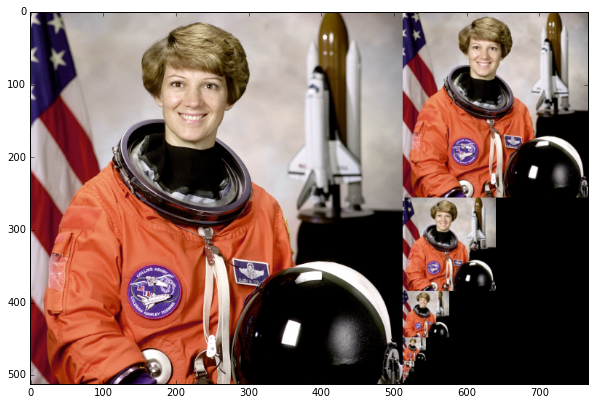

In [31]:
from skimage import data
from skimage.transform import pyramid_gaussian,pyramid_laplacian


image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2))

composite_image = np.zeros((rows, cols + cols / 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

plt.figure(figsize=[10,10])
plt.imshow(composite_image);

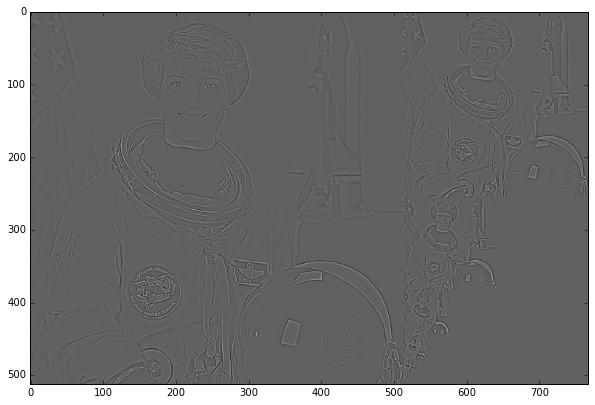

In [32]:
pyramid = tuple(pyramid_laplacian(image[:,:,0], downscale=2))

composite_image = np.zeros((rows, cols + cols / 2), dtype=np.double)

composite_image[:rows, :cols] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

plt.figure(figsize=[10,10])
plt.imshow(composite_image,cmap=cm.gray);

# Canny edge detection



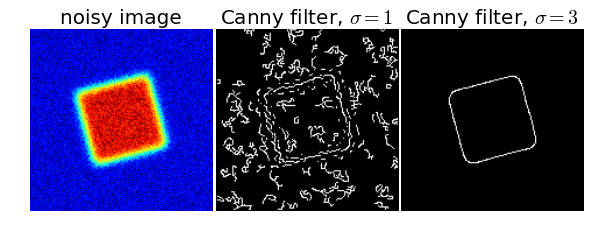

In [33]:
from scipy import ndimage

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

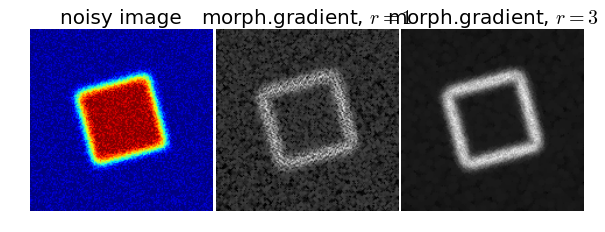

In [34]:
from skimage.morphology import disk
import skimage.filters.rank as skr

# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)-.1
im[im>1] = 1 #clip image
im[im<0] = 0 #clip image
im = (im*255).astype(np.uint8)
mgrad0 = skr.gradient(im,disk(1))
mgrad1 = skr.gradient(im,disk(3))

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(mgrad0, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('morph.gradient, $r=1$', fontsize=20)

ax3.imshow(mgrad1, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('morph.gradient, $r=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

## Canny edge detection algorithm

1. image smoothing

2. gradient intensity detection

3. local non-maximum suppression 

4. double border intensity threshold

5. weak edge suppression

image smoothing

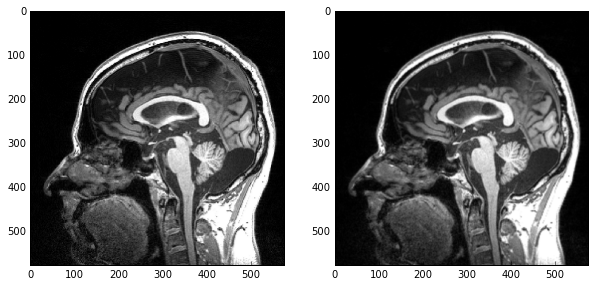

In [35]:
from skimage.io import imread
from skimage.filters import gaussian

ct = imread('https://upload.wikimedia.org/wikipedia/commons/5/5f/MRI_EGC_sagittal.png')
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(ct);

smooth_ct = gaussian(ct[:,:,0],1.)
plt.subplot(1,2,2)
plt.imshow(smooth_ct,cmap=plt.cm.gray);



gradient intensity detection

$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$

$\mathbf{\Theta} = \operatorname{atan2}\left(\mathbf{G}_y, \mathbf{G}_x\right)$

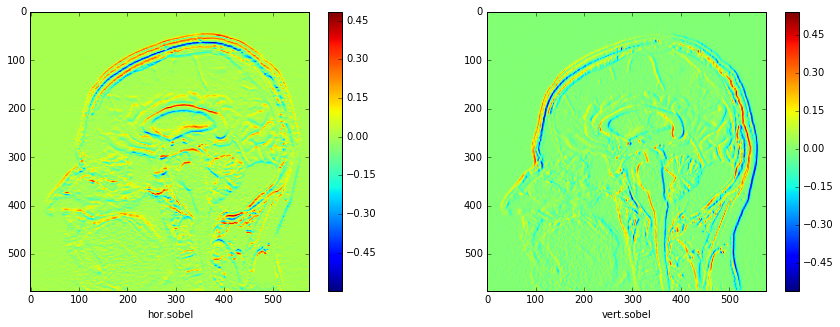

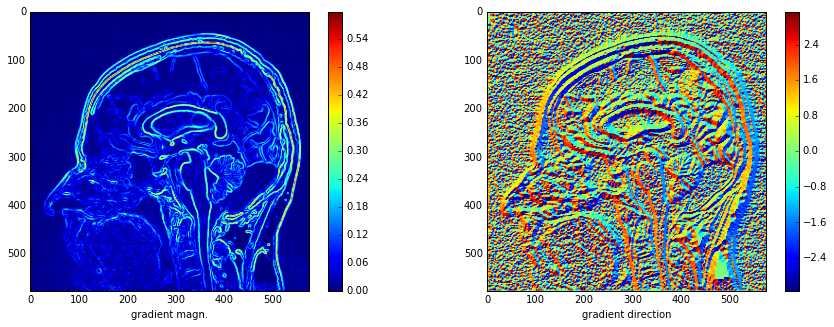

In [36]:
from skimage.filters import sobel_h,sobel_v

sh = sobel_h(smooth_ct)
sv = sobel_v(smooth_ct)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.imshow(sh)
plt.colorbar();
plt.xlabel('hor.sobel')
plt.subplot(1,2,2)
plt.imshow(sv)
plt.colorbar()
plt.xlabel('vert.sobel')

gm = np.sqrt(sh**2.+sv**2.)

angle = np.arctan2(sv,sh)

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.imshow(gm)
plt.colorbar();
plt.xlabel('gradient magn.')
plt.subplot(1,2,2)
plt.imshow(angle)
plt.colorbar()
plt.xlabel('gradient direction');



local non-maximum suppression

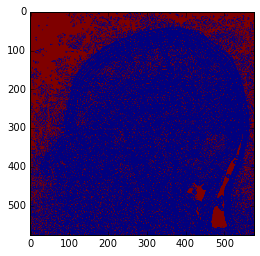

In [37]:
from skimage.morphology import disk
import skimage.filters.rank as skr

local_max = gm*255 >= skr.maximum((gm*255).astype(np.uint8),disk(1))
plt.imshow(local_max);

double border intensity threshold

e.g.
* weak border are >= 10% of image maximum
* weak border are >= 20% of image maximum

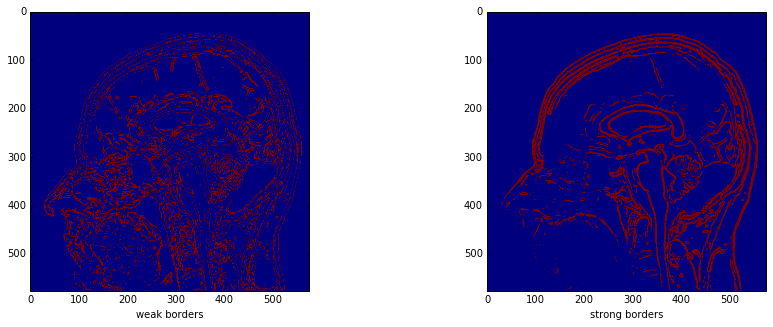

In [38]:
image_max = np.max(gm)
weak_borders = np.logical_and(.1*image_max <= gm, gm < .2*image_max)
strong_borders = gm >= .2*image_max
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.imshow(weak_borders)
plt.xlabel('weak borders')
plt.subplot(1,2,2)
plt.imshow(strong_borders)
plt.xlabel('strong borders');


weak edge suppression

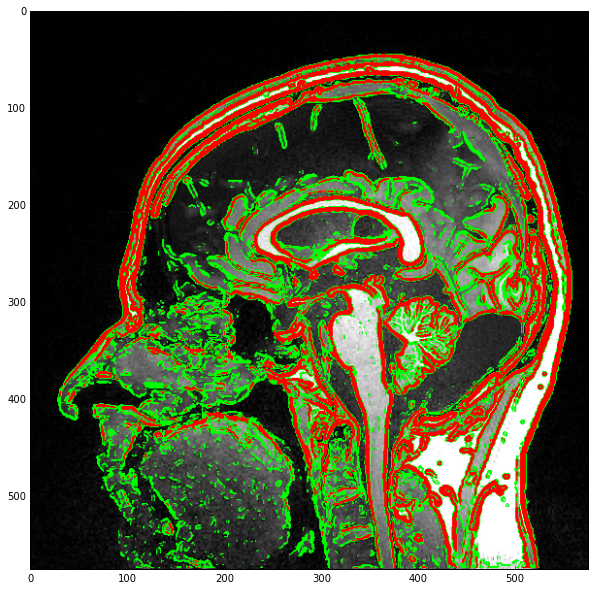

In [39]:
masked_ct = ct.copy()
masked_ct[weak_borders,:]=[0,255,0,255]
masked_ct[strong_borders,:]=[255,0,0,255]
plt.figure(figsize=[10,10])
plt.imshow(masked_ct);

example of canny edge implementation (parameters may differ)

Canny edges overlayed on the original image

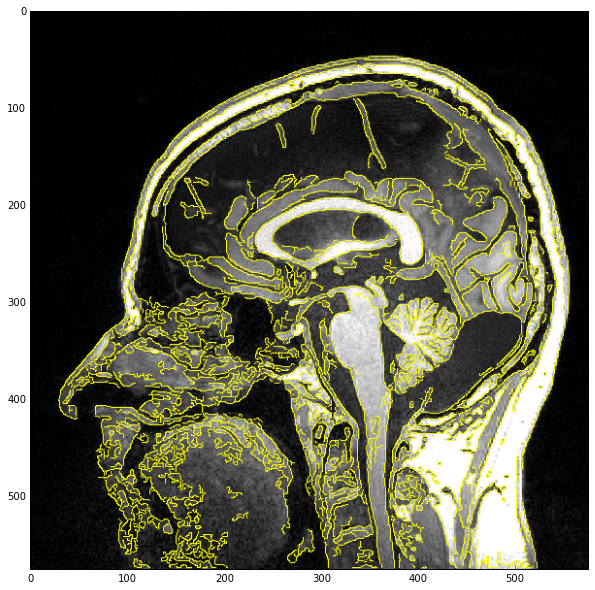

In [40]:
canny = feature.canny(ct[:,:,0],low_threshold=.1*255,high_threshold=.4*255)
masked_ct = ct.copy()
masked_ct[canny,:]=[255,255,0,255]
plt.figure(figsize=[10,10])
plt.imshow(masked_ct);

Comparison between canny edges and sobel edges

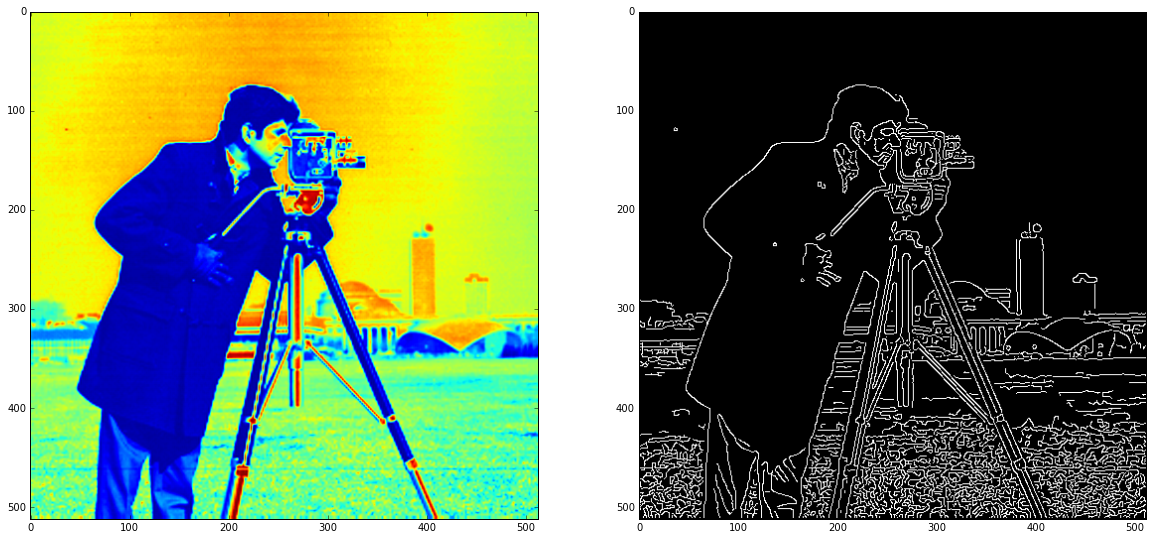

In [41]:
im = camera()
canny = feature.canny(im)*255

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(canny,cmap=plt.cm.gray);


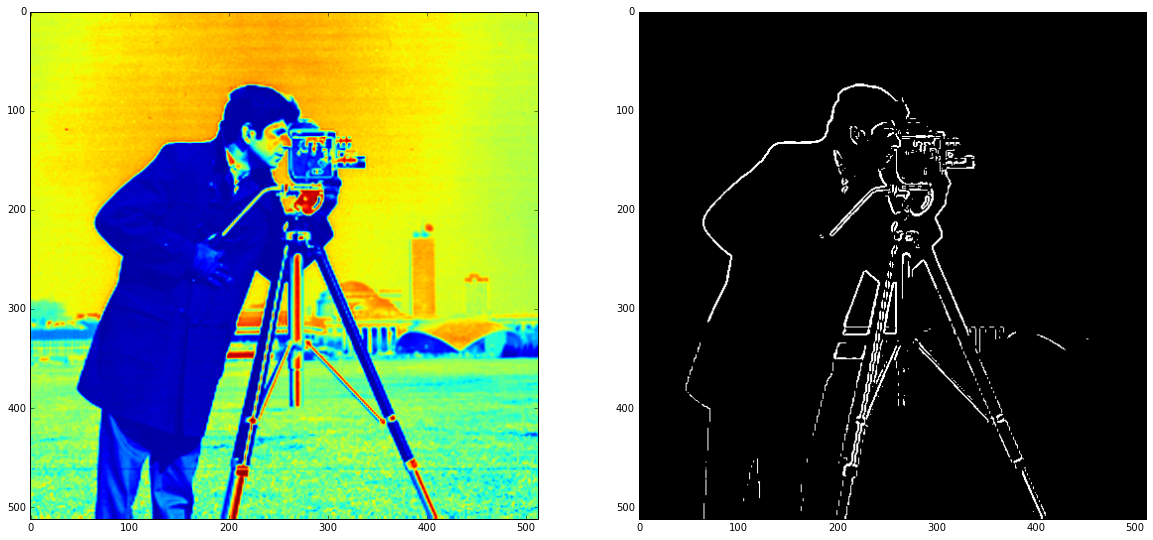

In [49]:
im = camera().astype(np.float)
_,_,fsobel = sobel(im) 

norm = 255*fsobel/np.max(fsobel)

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(norm>100,cmap=plt.cm.gray);
